## Spatio-Temporal Exploratory Data Analysis for Tick Bites in Ede, Netherlands

### Loading file

In [7]:
import pandas as pd
import geopandas as gpd

In [ ]:
gdf = gpd.read_file("ticks/NL_TickBites_Dec16_RD_New.shp")
gdf.head()

,OBJECTID,field_1,field_2,field_3,field_4,field_5,field_6,field_7,field_8,field_9,field_10,field_11,field_12,field_13,field_14,field_15,geometry
0,1,1,NaT,NaT,387000.000000,174000.000000,None,None,None,None,None,heide,wandelen,None,1000,De rode kring openbaarde zich in februari van ...,POINT (174000 387000)
1,2,2,2002-01-01,2012-06-05,427805.600595,60001.108122,3252LE,None,Goedereede,Goeree-Overflakkee,Zuid-Holland,tuin,tuinieren,1960,18,zonnen,POINT (60001.108 427805.601)
2,3,3,2002-01-01,2012-07-14,566788.639714,198817.497861,None,None,None,None,None,tuin,spelen,None,18,None,POINT (198817.498 566788.64)
3,4,5,2002-07-01,2012-03-31,511841.215297,202893.287001,8061RV,None,Hasselt,Zwartewaterland,Overijssel,tuin-weiland-moerasgebied,tuinieren,1960,14,koeien ophalen,POINT (202893.287 511841.215)
4,5,7,2003-01-01,2013-01-27,536045.842573,213043.090819,None,None,Zwolle,Zwolle,Overijssel,bos,wandelen,1965,13,None,POINT (213043.091 536045.843)


In [9]:
gdf.tail(5)

,OBJECTID,field_1,field_2,field_3,field_4,field_5,field_6,field_7,field_8,field_9,field_10,field_11,field_12,field_13,field_14,field_15,geometry
46833,46834,48968,2016-12-03,2016-12-03,488684.292455,100816.010045,None,None,Nieuwegein,Nieuwegein,Utrecht,duinen,wandelen,1989,18,None,POINT (100816.01 488684.293)
46834,46835,48969,2016-12-05,2016-12-05,375861.754001,172231.355345,None,None,None,Sterksel,Heeze-Leende,weetniet,weetniet,1953,15,None,POINT (172231.355 375861.754)
46835,46836,48970,2016-12-06,2016-12-06,415314.548623,40914.691155,4444AJ,None,'s-Heer Abtskerke,Borsele,Zeeland,bos,wandelen,1957,15,None,POINT (40914.691 415314.549)
46836,46837,48971,2016-12-08,2016-12-08,397539.873114,45188.229659,4484cp,None,Kortgene,Noord-Beveland,Zeeland,bos,spelen,2008,18,None,POINT (45188.23 397539.873)
46837,46838,48972,2016-12-09,2016-12-09,383889.617528,123253.601366,None,None,Loon op Zand,Loon op Zand,Noord-Brabant,weiland,wandelen,1957,12,None,POINT (123253.601 383889.617)


### Renaming column names

In [10]:
gdf.rename({
    "field_1": "ID",
    "field_2": "reporting_date",
    "field_3": "tick_bite_date",
    "field_4": "longitude",
    "field_5": "latitude",
    "field_6": "postal_code",
    "field_7": "Unknown_1",
    "field_8": "city",
    "field_9": "municipality",
    "field_10": "province",
    "field_11": "environment",
    "field_12": "activity",
    "field_13": "year_of_birth",
    "field_14": "zoom",
    "field_15": "general_remarks",

}, axis=1, inplace=True)

### Loading Ede's shapefile

In [ ]:
ede_shape  = gpd.read_file("ede-shape/Ede_shape.shp")
ede_shape.head()

,GM_CODE,GM_NAAM,WATER,OAD,STED,AANT_INW,AANT_MAN,AANT_VROUW,P_00_14_JR,P_15_24_JR,...,P_HH_M_K,GEM_HH_GR,P_WEST_AL,P_N_W_AL,P_MAROKKO,P_ANT_ARU,P_SURINAM,P_TURKIJE,P_OVER_NW,geometry
0,GM0228,Ede,NEE,1525,2,114682,56689,57993,18,14,...,35,2.3,7,8,2,0,1,2,4,"POLYGON ((182010.005 462674.48, 182247.789 462..."


In [12]:
ede_shape.crs = "EPSG:28992"

### Clip Ticks data for Ede's

In [13]:
gdf_ede_1 = gpd.sjoin(gdf, ede_shape, how="inner", predicate="within")

In [14]:
gdf_ede_1.head()

,OBJECTID,ID,reporting_date,tick_bite_date,longitude,latitude,postal_code,Unknown_1,city,municipality,...,P_HH_Z_K,P_HH_M_K,GEM_HH_GR,P_WEST_AL,P_N_W_AL,P_MAROKKO,P_ANT_ARU,P_SURINAM,P_TURKIJE,P_OVER_NW
17,18,20,2006-04-09,2006-04-09,451000.0,173000.0,None,None,Ede,Ede,...,30,35,2.3,7,8,2,0,1,2,4
36,37,40,2006-04-23,2006-04-23,451000.0,173000.0,None,None,Ede,Ede,...,30,35,2.3,7,8,2,0,1,2,4
58,59,62,2006-05-04,2006-05-04,451000.0,173000.0,None,None,Ede,Ede,...,30,35,2.3,7,8,2,0,1,2,4
240,241,247,2006-06-03,2006-06-03,451000.0,173000.0,None,None,Ede,Ede,...,30,35,2.3,7,8,2,0,1,2,4
325,326,334,2006-06-06,2006-06-06,451000.0,173000.0,None,None,Ede,Ede,...,30,35,2.3,7,8,2,0,1,2,4


### Save Ede's tick data as geojson

In [ ]:
gdf_ede_1.to_file("ede_ticks_reports.geojson", driver="GEOJSON")

In [ ]:
gdf = gpd.read_file("ede_ticks_reports.geojson")
gdf.head()

,OBJECTID,ID,reporting_date,tick_bite_date,longitude,latitude,postal_code,Unknown_1,city,municipality,...,P_HH_M_K,GEM_HH_GR,P_WEST_AL,P_N_W_AL,P_MAROKKO,P_ANT_ARU,P_SURINAM,P_TURKIJE,P_OVER_NW,geometry
0,18,20,2006-04-09,2006-04-09,451000.0,173000.0,None,None,Ede,Ede,...,35,2.3,7,8,2,0,1,2,4,POINT (173000 451000)
1,37,40,2006-04-23,2006-04-23,451000.0,173000.0,None,None,Ede,Ede,...,35,2.3,7,8,2,0,1,2,4,POINT (173000 451000)
2,59,62,2006-05-04,2006-05-04,451000.0,173000.0,None,None,Ede,Ede,...,35,2.3,7,8,2,0,1,2,4,POINT (173000 451000)
3,241,247,2006-06-03,2006-06-03,451000.0,173000.0,None,None,Ede,Ede,...,35,2.3,7,8,2,0,1,2,4,POINT (173000 451000)
4,326,334,2006-06-06,2006-06-06,451000.0,173000.0,None,None,Ede,Ede,...,35,2.3,7,8,2,0,1,2,4,POINT (173000 451000)


### Plotting Tick Reports Per Month

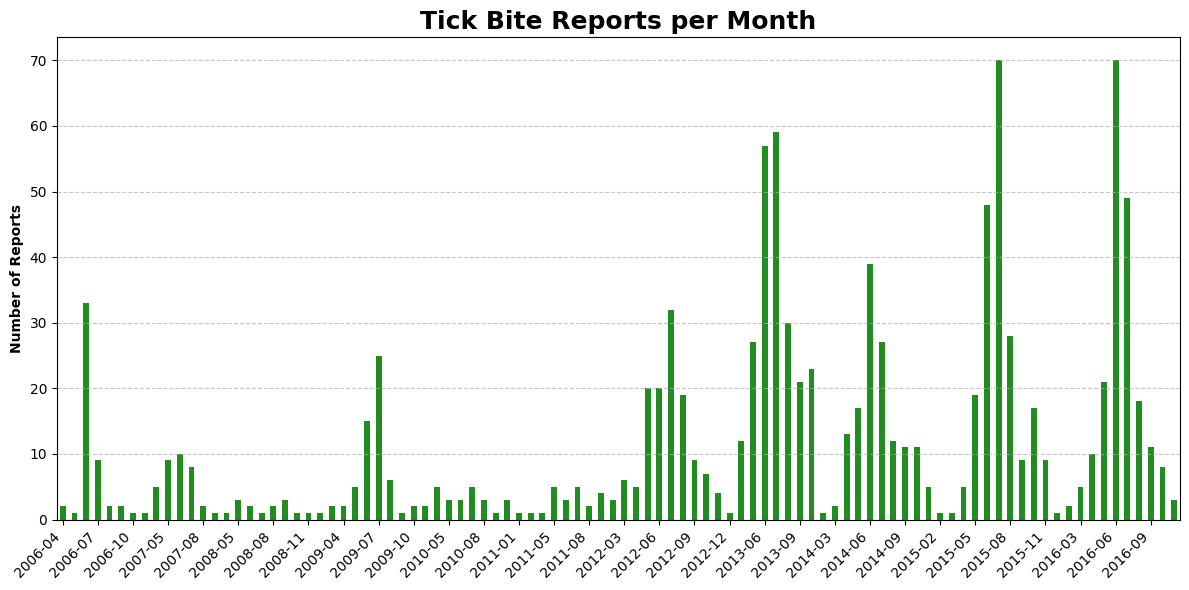

In [12]:
import matplotlib.pyplot as plt

gdf["reporting_date"] = pd.to_datetime(gdf["reporting_date"])
gdf['month_year'] = gdf['reporting_date'].dt.to_period('M')
monthly_counts = gdf.groupby("month_year").size().sort_index()

plt.figure(figsize=(12, 6))
monthly_counts.plot(kind='bar', color='forestgreen')

plt.title("Tick Bite Reports per Month", fontsize=18, fontweight="bold")
plt.xlabel("",)
plt.ylabel("Number of Reports", fontweight="bold")

# Reduce number of xticks
xticks = plt.gca().get_xticks()
labels = plt.gca().get_xticklabels()
plt.xticks(xticks[::3], [label.get_text() for i, label in enumerate(labels) if i % 3 == 0], rotation=45, ha='right')

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("total_ticks_reports_overall.png", dpi=300, bbox_inches='tight')
plt.show()


#### Calculating proportion of tick reports per month

In [13]:
gdf["month"] = gdf["reporting_date"].dt.month
(gdf.groupby("month").size() / gdf.groupby("month").size().sum()) * 100

month
1      0.090580
2      0.271739
3      1.902174
4      5.434783
5     11.775362
6     27.173913
7     26.268116
8     11.231884
9      6.612319
10     6.884058
11     2.083333
12     0.271739
dtype: float64

### Ticks Report in a week

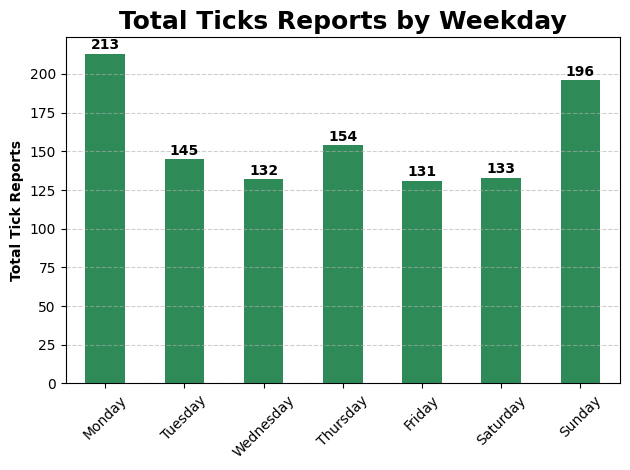

In [14]:
import matplotlib.pyplot as plt

# Get weekday order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

gdf['day_name'] = pd.to_datetime(gdf["reporting_date"]).dt.day_name()
# Compute tick report counts per weekday
mean_ticks = gdf.groupby("day_name").size().reindex(weekday_order)

# Plot
ax = mean_ticks.plot(kind="bar", color="seagreen")
plt.title("Total Ticks Reports by Weekday", fontsize=18, fontweight="bold")
plt.ylabel("Total Tick Reports", fontweight="bold")
plt.xlabel("")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add count labels on top of bars
for i, value in enumerate(mean_ticks):
    plt.text(i, value + 1, str(value), ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.savefig("total_ticks_reports_weekdays.png", dpi=300, bbox_inches='tight')
plt.show()


### Calculating Age from year of birth

In [15]:
import pandas as pd
import numpy as np

# Replace "None" strings and other non-numeric values with NaN
gdf["year_of_birth_clean"] = pd.to_numeric(gdf["year_of_birth"], errors="coerce")

# If you need it as a datetime (e.g., 1980 → 1980-01-01)
gdf["date_of_birth"] = pd.to_datetime(gdf["year_of_birth_clean"], format="%Y", errors="coerce")

# (Optional) Calculate age at time of tick bite
gdf["tick_bite_date"] = pd.to_datetime(gdf["reporting_date"], errors="coerce")
gdf["age_at_bite"] = gdf["tick_bite_date"].dt.year - gdf["date_of_birth"].dt.year

### Plotting distribution of Age 

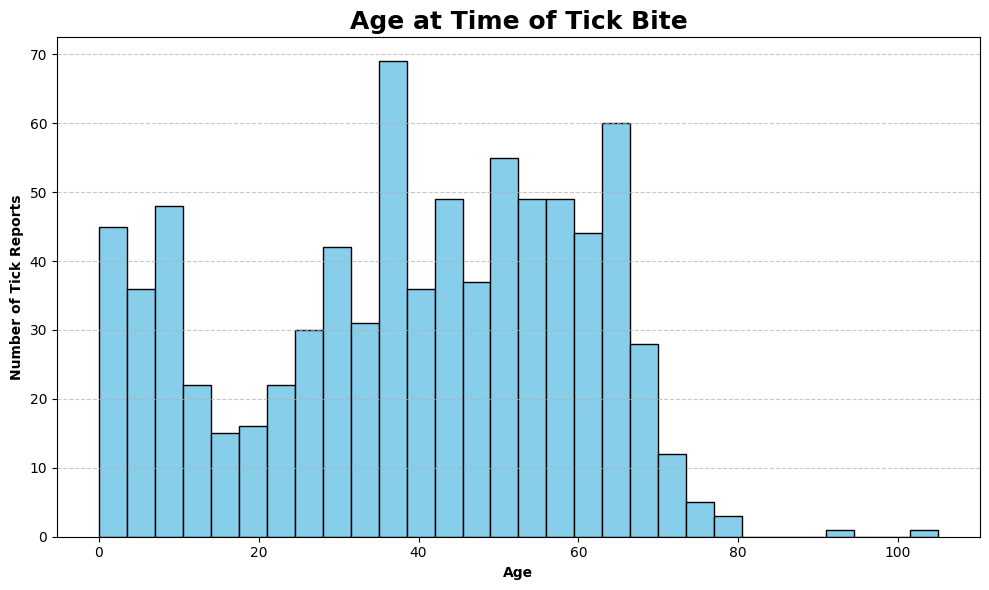

In [16]:
import matplotlib.pyplot as plt

# Drop NaN values for plotting
age_data = gdf["age_at_bite"].dropna()

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(age_data, bins=30, color='skyblue', edgecolor='black')

plt.title("Age at Time of Tick Bite", fontweight="bold", fontsize=18)
plt.xlabel("Age", fontweight="bold")
plt.ylabel("Number of Tick Reports", fontweight="bold")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("total_ticks_reports_agewise.png", dpi=300, bbox_inches='tight')
plt.show()

In [17]:
gdf["age_at_bite"] = gdf["age_at_bite"].dropna()

In [18]:
gdf = gdf[gdf["age_at_bite"]>0]

#### Calculating Tick Reports Per Age Group

In [19]:
# Define bins and labels
bins = list(range(0, 100, 10)) + [float('inf')]  # [0, 10, 20, ..., 90, inf]
labels = [f"{i}-{i+10}" for i in range(0, 90, 10)] + ["90+"]

# Categorize age values into bins
gdf["age_group"] = pd.cut(gdf["age_at_bite"], bins=bins, labels=labels, right=False)

# Display count per group (optional)
print(gdf["age_group"].value_counts().sort_index())

age_group
0-10     107
10-20     58
20-30     75
30-40    137
40-50    124
50-60    140
60-70    132
70-80     20
80-90      0
90+        2
Name: count, dtype: int64


In [20]:
(gdf["age_group"].value_counts().sort_index() / len(gdf)) * 100

age_group
0-10     13.459119
10-20     7.295597
20-30     9.433962
30-40    17.232704
40-50    15.597484
50-60    17.610063
60-70    16.603774
70-80     2.515723
80-90     0.000000
90+       0.251572
Name: count, dtype: float64

### Grouping activities into broader groups

In [21]:
def categorize_activity(activity):
    if activity is None:
        return "Other"
    
    a = activity.lower()
    
    if "wandelen" in a:
        return "Walking"
    elif "honduitlaten" in a or "hond uitlaten" in a:
        return "Walking"
    elif "tuinieren" in a:
        return "Gardening"
    elif "spelen" in a:
        return "Playing"
    elif "picknicken" in a or "picknick" in a:
        return "Playing"
    elif "groenbeheer" in a:
        return "Gardening"
    elif "weetniet" in a or "weet niet" in a:
        return "Other"
    elif "anders" in a:
        return "Other"
    else:
        return "Other"

gdf["activity_grouped"] = gdf["activity"].apply(categorize_activity)

#### Plotting Ticks report per activity

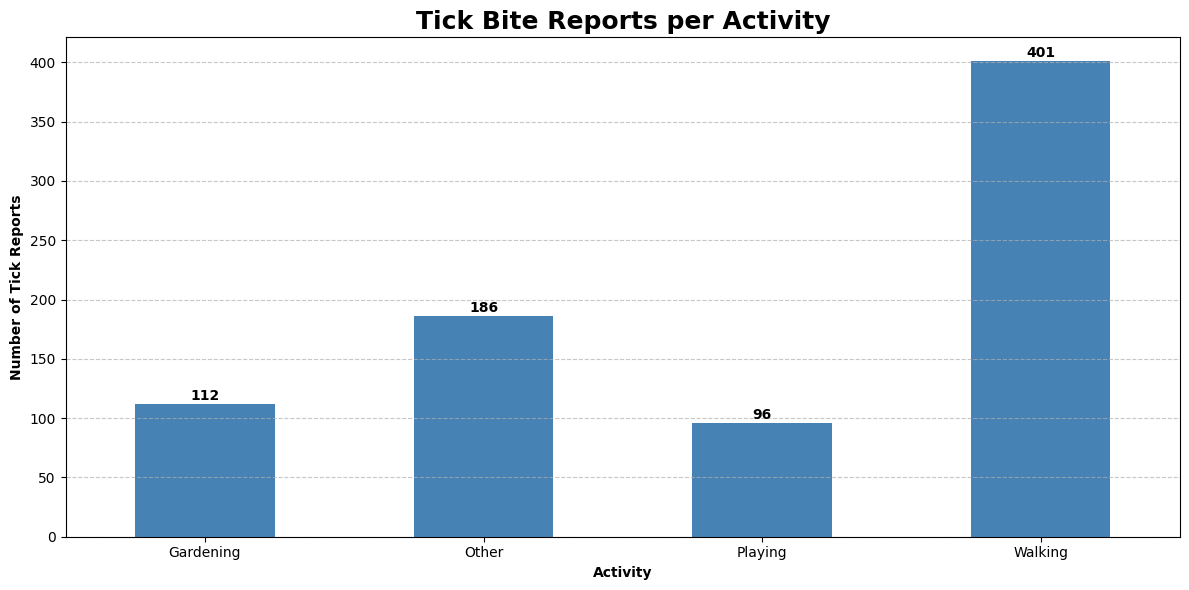

In [22]:
import matplotlib.pyplot as plt

# Group and count by activity
activity_count = gdf.groupby("activity_grouped").size().sort_index()

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))
activity_count.plot(kind='bar', ax=ax, color='steelblue')

# Titles and labels
ax.set_title("Tick Bite Reports per Activity", fontweight="bold", fontsize=18)
ax.set_xlabel("Activity", fontweight="bold")
ax.set_ylabel("Number of Tick Reports", fontweight="bold")
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add count labels on top of bars
for i, count in enumerate(activity_count):
    ax.text(i, count + 1, str(count), ha='center', va='bottom', fontweight='bold', fontsize=10)
plt.savefig("total_ticks_reports_activitywise.png", dpi=300, bbox_inches='tight')
plt.show()


#### Calculating tick reports proportion per activity

In [23]:
(activity_count / len(gdf)) * 100

activity_grouped
Gardening    14.088050
Other        23.396226
Playing      12.075472
Walking      50.440252
dtype: float64

### Calculating Tick Reports per environment

The 'environment' feature provided in the NL tick data appeared inconsistent when compared with actual land use patterns. Therefore, an external land use dataset was used as a more reliable feature in the analysis.

In [ ]:
landuse = gpd.read_file("landuse/Ede_lnduse.shp")
gdf.drop("index_right", axis=1, inplace=True)
landuse.crs = "EPSG:28992"
gdf = gpd.sjoin(gdf, landuse[["BG2015", "geometry"]], predicate="within", how="inner")
gdf.rename({"BG2015": "landuse"}, axis=1, inplace=True)

# Map numeric landuse codes to labels
landuse_map = {
    20: "Residential",
    60: "Forest",
    61: "Sand Dunes",
    62: "Farms"
}

gdf["landuse_name"] = gdf["landuse"].apply(lambda x: landuse_map[x])

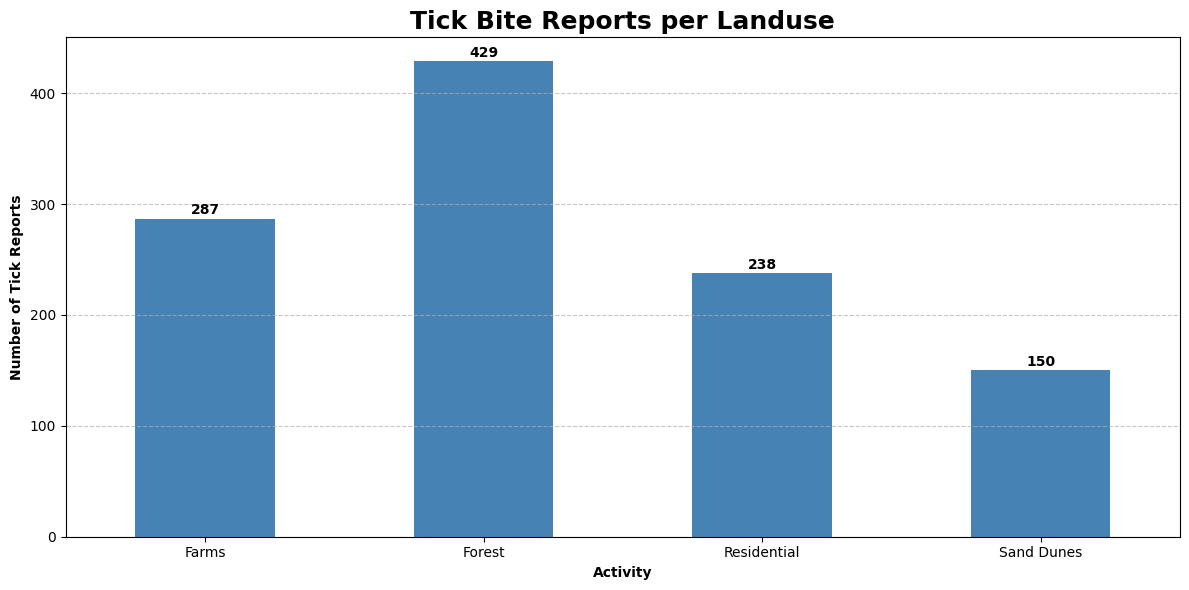

In [31]:
import matplotlib.pyplot as plt

activity_count = gdf.groupby("landuse_name").size().sort_index()

fig, ax = plt.subplots(figsize=(12, 6))
activity_count.plot(kind='bar', color="steelblue")

# Titles and labels
ax.set_title("Tick Bite Reports per Landuse", fontweight="bold", fontsize=18)
ax.set_xlabel("Activity", fontweight="bold")
ax.set_ylabel("Number of Tick Reports", fontweight="bold")
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add count labels on top of bars
for i, count in enumerate(activity_count):
    ax.text(i, count + 1, str(count), ha='center', va='bottom', fontweight='bold', fontsize=10)
plt.savefig("total_ticks_reports_landusewise.png", dpi=300, bbox_inches='tight')
plt.show()


### Tick Bite proportion per tick bite

In [ ]:
(activity_count / len(gdf)) * 100

environment_grouped
Forest        66.918239
Garden        21.006289
Heather        6.666667
Other          0.628931
Pasture        0.754717
Unknown        3.270440
Urban Park     0.754717
dtype: float64

### Spatial Distribution of Tick Bites (HexMap)

<Axes: >

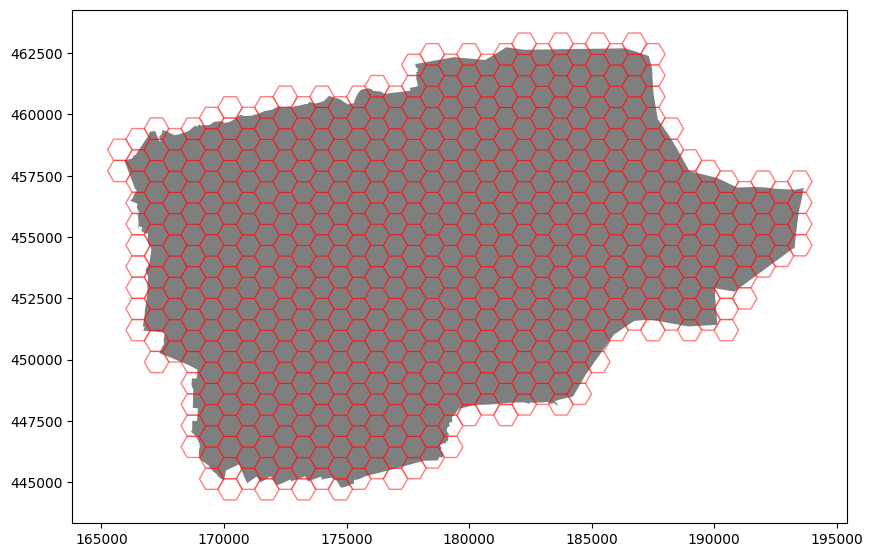

In [ ]:
import geopandas as gpd
import geohexgrid as ghg

# # Load New Zealand territorial authorities projected in EPSG 2193 (NZTM)
neth = gpd.read_file("ede-shape/Ede_shape.shp")
neth.crs = "EPSG:28992"

# Cover it minimally with hexagons of circumradius 10 kilometres
grid = ghg.make_grid_from_gdf(neth, R=500)

# # Plot
base = neth.to_crs("EPSG:28992").plot(color="black", figsize=(10, 10), aspect="equal")
grid.plot(ax=base, color="white", edgecolor="red", alpha=0.5)

In [ ]:
if 'index_right' in gdf.columns:
    gdf = gdf.drop(columns='index_right')
if 'index_right' in grid.columns:
    grid = grid.drop(columns='index_right')

### Adding Ticks Count Per Hexcell

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Ensure both GeoDataFrames use the same CRS
gdf = gdf.to_crs(grid.crs)

# Perform spatial join: assign each point to a hex cell
joined = gpd.sjoin(gdf, grid, how="inner", predicate="within")

# Count the number of points in each hex (using the grid's index or ID)
hex_counts = joined.groupby(joined.index_right).size()

# Add counts to the original grid GeoDataFrame
grid["tick_count"] = grid.index.map(hex_counts).fillna(0).astype(int)

### Visualising Spatial Hex Map

/home/saheel/Documents/ITC/coursework/quartile-4/Spatio-Temporal-Analysis/Group-Assignment/env/lib/python3.12/site-packages/mapclassify/classifiers.py:1653: UserWarning: Not enough unique values in array to form 50 classes. Setting k to 11.
  self.bins = quantile(y, k=k)


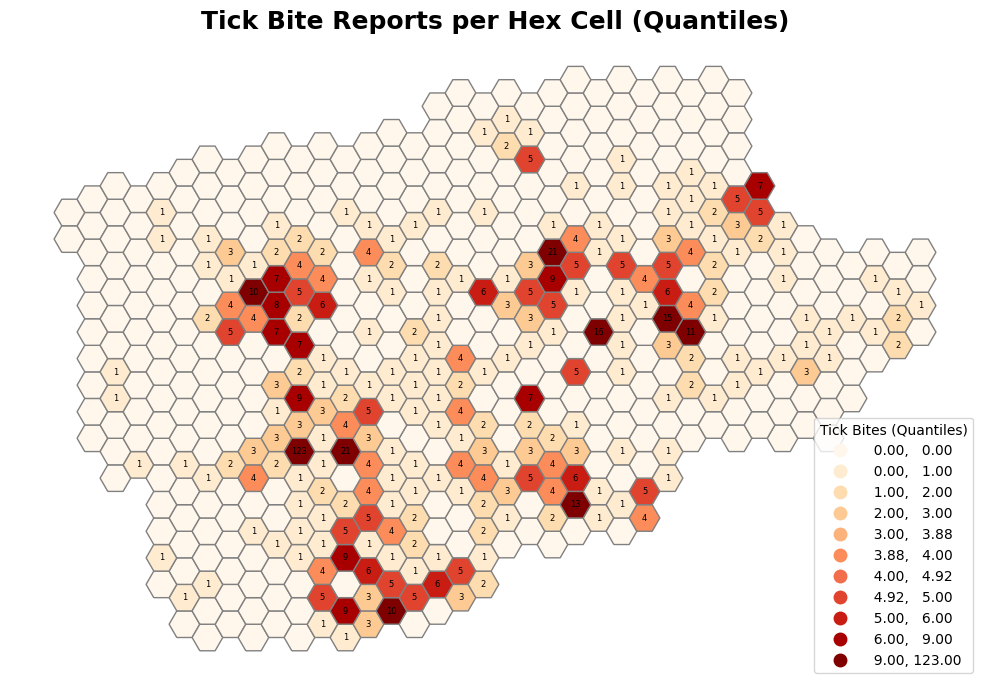

In [ ]:
import mapclassify
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))

# Plot with quantile-based classification
grid.plot(
    column="tick_count",
    scheme="Quantiles",
    k=50,  # Number of quantile classes
    cmap="OrRd",
    edgecolor="grey",
    legend=True,
    ax=ax,
    legend_kwds={"title": "Tick Bites (Quantiles)"}
)

# Annotate each hex cell with the tick count at the centroid
for idx, row in grid.iterrows():
    count = row["tick_count"]
    if count > 0:  # Optional: skip empty cells
        x, y = row["geometry"].centroid.coords[0]
        ax.text(
            x, y,
            str(int(count)),  # round/convert if needed
            ha='center', va='center',
            fontsize=6,
            color='black'
        )

plt.title("Tick Bite Reports per Hex Cell (Quantiles)", fontsize=18, fontweight="bold")
plt.axis("off")
plt.tight_layout()
plt.savefig("hexmap-ede.png", dpi=300)
plt.show()


In [ ]:
grid.to_file("hex-grid-tick-reports.geojson", driver="GeoJSON")